<a href="https://colab.research.google.com/github/ADHIL-VENGAT/CE888-DataScience-and-Decision-making/blob/main/exploration/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [58]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
#df['y'] = pd.get_dummies(df['Y']) ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df['']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  y    

In [47]:
#How many samples and features are there?

# YOUR CODE HERE
print('number of samples:',df.shape[0], 'number of features:', df.shape[1])

number of samples: 178 number of features: 14


In [48]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
df['y'].value_counts()


Ellipsis    178
Name: y, dtype: int64

In [24]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
df.drop(labels='y', axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


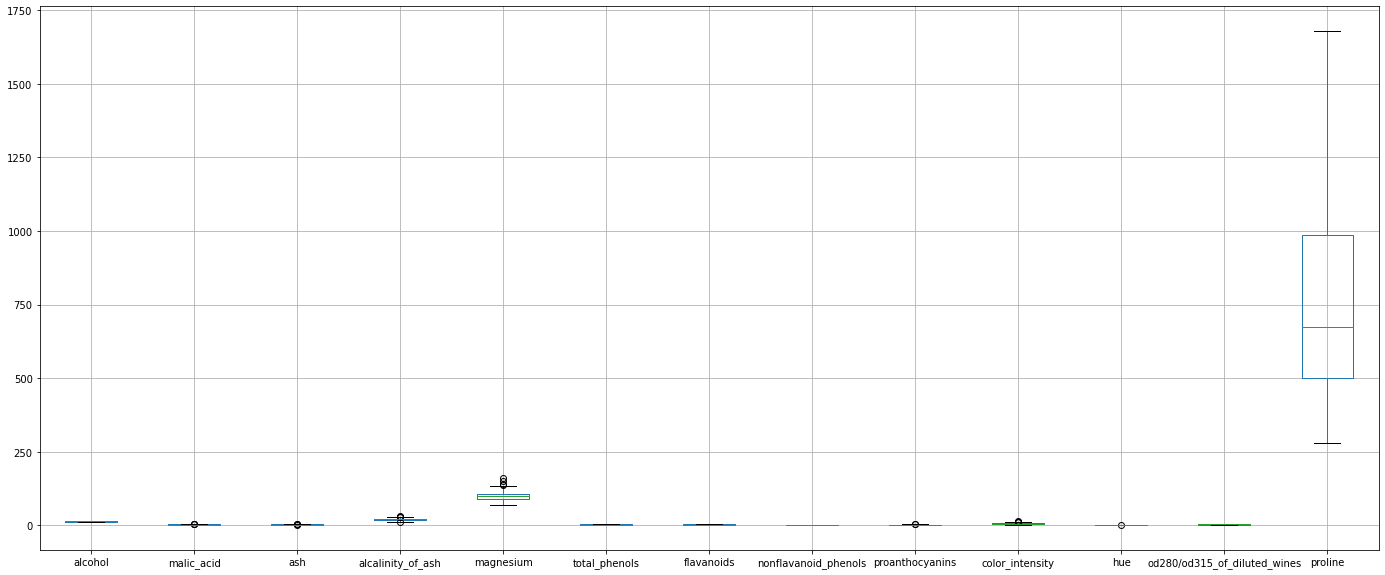

In [50]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
df.drop(labels='y', axis=1).boxplot(figsize=(24,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ab02e4d10>,
      dtype=object)

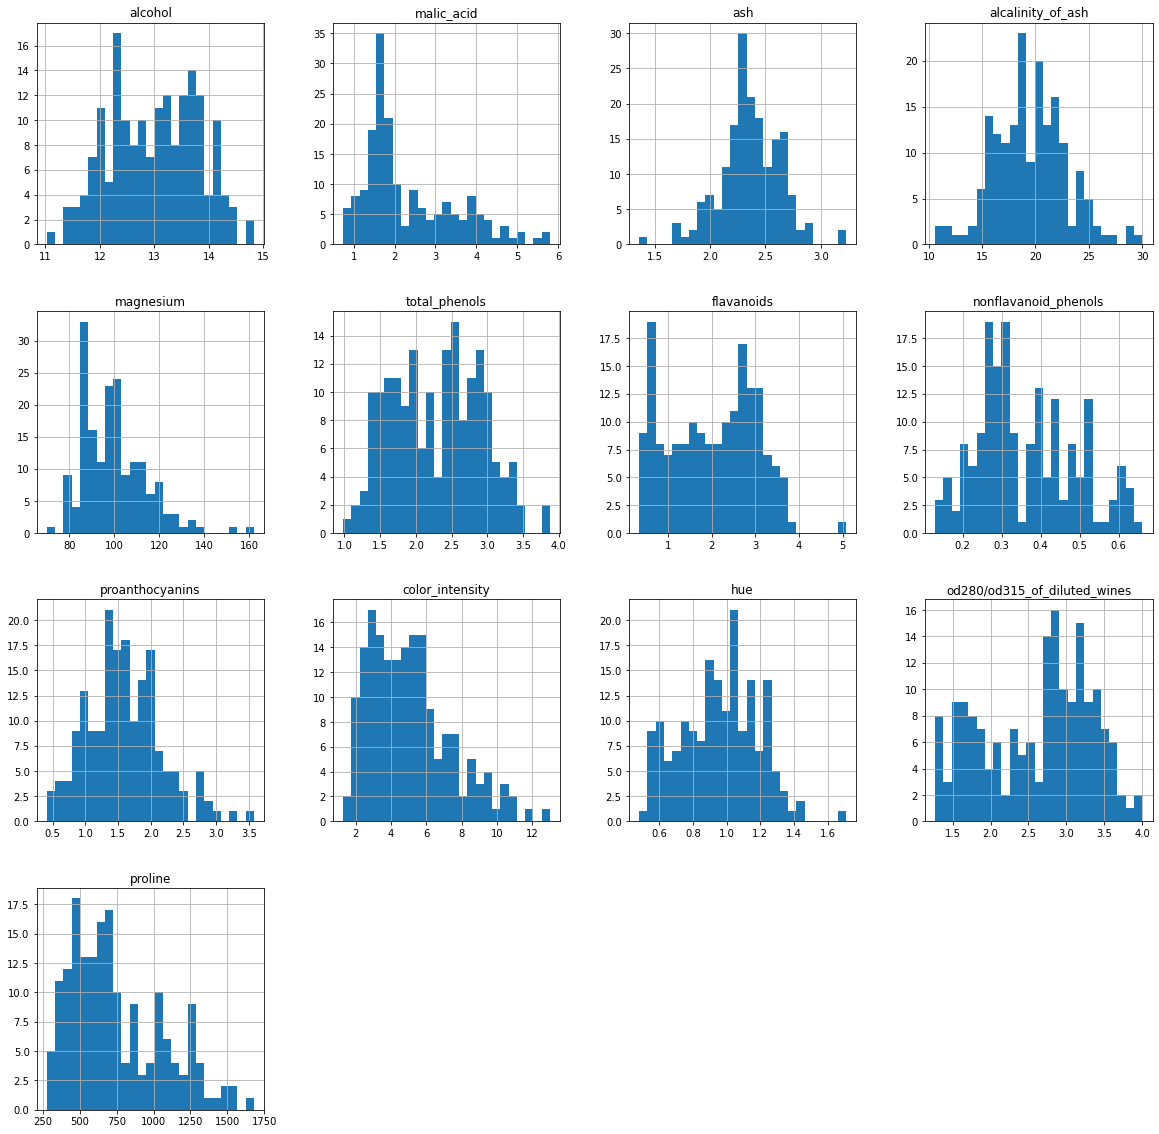

In [51]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
df.hist(bins=25,figsize=(20,20))

Let's do some multivariate analysis

In [ ]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE

In [ ]:
# What is the highest correlation between features?



You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE


In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!